Algorithms:<br>
1. Buy low sell high algorithm

	-allow window for no trading between first 30min and last 30 minutes of the trading day<br>
	-needs to set what price the stock was bought at<br>
	-needs to sell right before hitting this price<br>
	-needs to sell 10% above what the stock was bought at (rough guess)<br>
	-3 variables: buy price, stop loss price, profit price = buy price + 10%<br>
<br>
      -Sell stocks at EOD

In [1]:
from dotenv import load_dotenv
from datetime import datetime
load_dotenv()

True

tock states<br>
Unbought<br>
Bought, hasnt met thresholdawd<br>
Bought, crossed threshold

In [2]:
import matplotlib.pyplot as plt
    
class Stock:
    def __init__(self, stockDict):
        self.history = []
        self.historySmoothed = []
        self.adaptiveSellFloor = 0
        self.update(stockDict)
        self.buy()
        
    def delete(self):
        del dixonStocks[self.symbol]

    def update(self, indict, adaptionInertia=0.8):
        for key, value in indict.items():
            exec("self." + key + " = value")
        self.bid_price = float(self.bid_price)
        # LPF / moving average for Buy Floor
        # only apply on upswing
        if float(self.bid_price) > self.adaptiveSellFloor:
            self.adaptiveSellFloor = adaptionInertia*self.adaptiveSellFloor + float(self.bid_price) * (1-adaptionInertia)
        
        self.history += [float(self.bid_price)]
        self.historySmoothed += [self.adaptiveSellFloor]
        print("checking " + self.symbol)
        
        # calculate the ratio to the buy time
        # ratioRelativeToBuy = float(self.bid_price) / float(self.buyPrice)
        
        # if the bid price falls below the floor, sell!
        if self.bid_price <= self.adaptiveSellFloor:
            self.sell()
            

    def graph(self):

        # Create the figure and axes
        fig, ax = plt.subplots()

        # Plot the first array
        ax.plot(self.historySmoothed, label='Smoothed')

        # Plot the second array
        ax.plot(self.history, label='Bid price')

        # Set the title
        ax.set_title('Stock History: ' + self.symbol)

        # Set the legend
        ax.legend()

        # Display the plot
        plt.show()

    
    def buy(self):
        self.buyPrice = float(self.ask_price)
        # set the adaptive sell floor to .9 of the buy price
        self.adaptiveSellFloor = 0.9 * self.buyPrice
        print("--------------------------------")
        print("Buying " + self.symbol)
        print("Bought at " + str(self.buyPrice))
        print("--------------------------------")
        pass

    def sell(self):
        print("--------------------------------")
        print("Selling " + self.symbol)
        print("Bought at " + str(self.buyPrice))
        print("Sold at " + str(self.bid_price))
        print("YOUR $$$: " + str(float(self.bid_price) - float(self.buyPrice)))
        print("--------------------------------")
        self.delete()
    
    # Tolerence Map

    #  
    #
    #   _________ buyPoint
    #
    #   _________ Adaptive sellFloor = LowPass Filter
    #
    #
    # AdaptionInertia is a parameter that lets us adjust the tracking speed of the LPF / Moving average\
            

In [3]:
dixonStocks = {}

In [4]:
import requests

In [5]:
def getRobinHoodTop100():

    # Set up the API endpoint
    endpoint = "https://api.robinhood.com/marketdata/tops/"

    # Send the API request
    response = requests.get(endpoint, params={"limit": 100})

    # Check if the request was successful
    if response.status_code == 200:
        # Extract the data from the response
        data = response.json()

        # Process the data
        if "results" in data:
            top_stocks = data["results"]
            
            # Print the top 100 stocks
            for stock in top_stocks:
                print(stock["symbol"])
    else:
        print("Error occurred. Status code:", response.status_code)

In [6]:
def BuyLowSellHigh(stockListOfDicts):
    
    for stockDict in stockListOfDicts:
        stockSymbol = stockDict["symbol"]
        heldStockSymbols = dixonStocks.keys()
        
        # if we dont have the stock, buy it and add to dixonstocks
        # stock will buy itself upon creation
        if stockSymbol not in heldStockSymbols:
            dixonStocks[stockSymbol] = Stock(stockDict)
        # otherwise, run the update command, which may sell itself
        else:
            dixonStocks[stockSymbol].update(stockDict)
            
        

mport robin_stocks.robinhood as rh<br>
mport robin_stocks.gemini as gem<br>
mport robin_stocks.tda as tda

In [7]:
import robin_stocks.robinhood as rs
import os

In [8]:
robin_user = os.environ.get("robinhood_username")
robin_pass = os.environ.get("robinhood_password")
rs.login(username=robin_user,
         password=robin_pass,
         expiresIn=86400,
         by_sms=True)

{'access_token': 'eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCJ9.eyJkY3QiOjE2ODY1MTg1MTcsImRldmljZV9oYXNoIjoiYWU2ZThhZGJhNTA2MDlhNDQ3NDg1M2U0YWI1ODM2M2QiLCJleHAiOjE2ODY5MzgzNDEsImxldmVsMl9hY2Nlc3MiOmZhbHNlLCJtZXRhIjp7Im9pZCI6ImM4MlNIMFdaT3NhYk9YR1Ayc3hxY2ozNEZ4a3ZmbldSWkJLbEJqRlMiLCJvbiI6IlJvYmluaG9vZCJ9LCJvcHRpb25zIjpmYWxzZSwic2NvcGUiOiJpbnRlcm5hbCIsInNlcnZpY2VfcmVjb3JkcyI6W3siaGFsdGVkIjpmYWxzZSwic2VydmljZSI6Im51bW11c191cyIsInNoYXJkX2lkIjoyLCJzdGF0ZSI6ImF2YWlsYWJsZSJ9LHsiaGFsdGVkIjpmYWxzZSwic2VydmljZSI6ImJyb2tlYmFja191cyIsInNoYXJkX2lkIjoxMSwic3RhdGUiOiJhdmFpbGFibGUifV0sInNybSI6eyJiX3VzIjp7ImhsIjpmYWxzZSwic2lkIjoxMSwic3QiOiJhdiJ9LCJuX3VzIjp7ImhsIjpmYWxzZSwic2lkIjoyLCJzdCI6ImF2In19LCJ0b2tlbiI6Ik5SM0tYMFVGYWExOHJGTDU5ZWc3czI3MFU4WDlocyIsInVzZXJfaWQiOiIzNjExMGY5NC1jOWNhLTQ3NjItYmQ5Mi04MGRhNjYzYzU3MzIiLCJ1c2VyX29yaWdpbiI6IlVTIn0.AsZS4RqUVvgTCkfoYazUSTfomkowFKUpqX3NEbF41SuU_logZIqQgNVXFm6TPsGtS_qp2q7H7VWQfQ3ynpCOe4jjRYzmd9wviItuhyxvsvf9E-b207KeDSNv3XEDMFS1kK2zH0HV7LBp4x3YDvmH-r8ccdPs20Wnxcd-o_GjmEezx

Get the top 100 stocks

Print the symbols of the top 100 stocks

In [9]:
import json
top100listOfDicts = rs.get_top_100()
  

tick
checking TSLA
--------------------------------
Buying TSLA
Bought at 243.94
--------------------------------
checking AAPL
--------------------------------
Buying AAPL
Bought at 180.86
--------------------------------
checking AMZN
--------------------------------
Buying AMZN
Bought at 135.0
--------------------------------
checking F
--------------------------------
Buying F
Bought at 13.78
--------------------------------
checking AMC
--------------------------------
Buying AMC
Bought at 4.78
--------------------------------
checking APE
--------------------------------
Buying APE
Bought at 1.6
--------------------------------
checking MSFT
--------------------------------
Buying MSFT
Bought at 336.5
--------------------------------
checking SNDL
--------------------------------
Buying SNDL
Bought at 14.15
--------------------------------
checking DIS
--------------------------------
Buying DIS
Bought at 100.0
--------------------------------
checking NIO
-----------------------

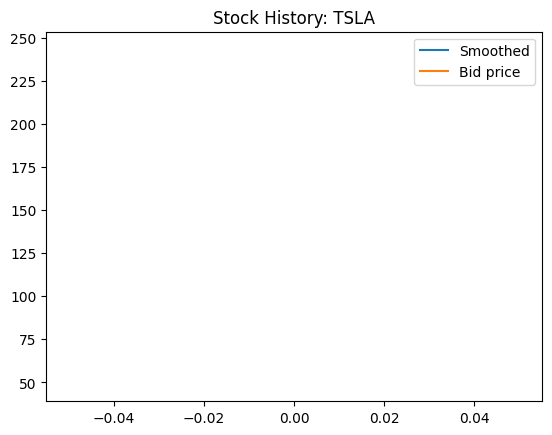

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Selling SNDL
Bought at 14.15
Sold at 1.4
YOUR $$$: -12.75
--------------------------------
checking DIS
--------------------------------
Selling DIS
Bought at 100.0
Sold at 84.05
YOUR $$$: -15.950000000000003
--------------------------------
checking NIO
checking META
--------------------------------
Selling META
Bought at 300.0
Sold at 1.0
YOUR $$$: -299.0
--------------------------------
checking LCID
--------------------------------
Selling LCID
Bought at 55.21
Sold at 6.1
YOUR $$$: -49.11
--------------------------------
checking VOO
--------------------------------
Selling VOO
Bought at 429.19
Sold at 361.56
YOUR $$$: -67.63
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Selling GPRO
Bought at 4.6
Sold at 3.83
YOUR $$$: -0.76999999999999

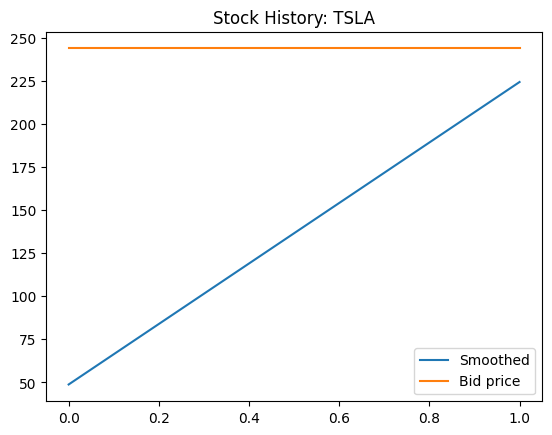

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Buying SNDL
Bought at 14.15
--------------------------------
checking DIS
--------------------------------
Buying DIS
Bought at 100.0
--------------------------------
checking NIO
checking META
--------------------------------
Buying META
Bought at 300.0
--------------------------------
checking LCID
--------------------------------
Buying LCID
Bought at 55.21
--------------------------------
checking VOO
--------------------------------
Buying VOO
Bought at 429.19
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Buying GPRO
Bought at 4.6
--------------------------------
checking PFE
--------------------------------
Buying PFE
Bought at 44.15
--------------------------------
checking BABA
checking PLUG
checking CCL
checking AAL
----------------

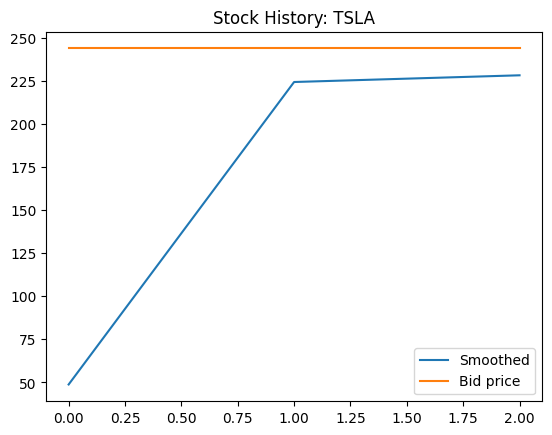

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Selling SNDL
Bought at 14.15
Sold at 1.4
YOUR $$$: -12.75
--------------------------------
checking DIS
--------------------------------
Selling DIS
Bought at 100.0
Sold at 84.05
YOUR $$$: -15.950000000000003
--------------------------------
checking NIO
checking META
--------------------------------
Selling META
Bought at 300.0
Sold at 1.0
YOUR $$$: -299.0
--------------------------------
checking LCID
--------------------------------
Selling LCID
Bought at 55.21
Sold at 6.1
YOUR $$$: -49.11
--------------------------------
checking VOO
--------------------------------
Selling VOO
Bought at 429.19
Sold at 361.56
YOUR $$$: -67.63
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Selling GPRO
Bought at 4.6
Sold at 3.83
YOUR $$$: -0.76999999999999

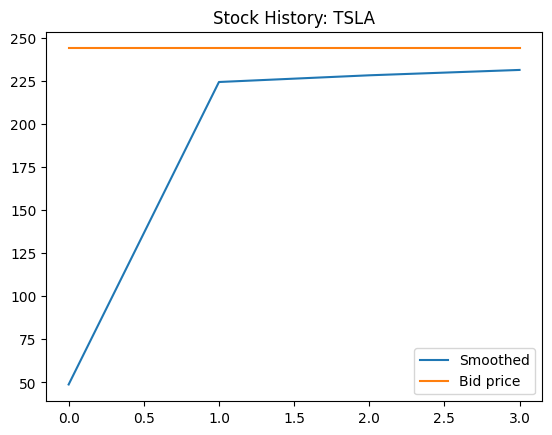

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Buying SNDL
Bought at 14.15
--------------------------------
checking DIS
--------------------------------
Buying DIS
Bought at 100.0
--------------------------------
checking NIO
checking META
--------------------------------
Buying META
Bought at 300.0
--------------------------------
checking LCID
--------------------------------
Buying LCID
Bought at 55.21
--------------------------------
checking VOO
--------------------------------
Buying VOO
Bought at 429.19
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Buying GPRO
Bought at 4.6
--------------------------------
checking PFE
--------------------------------
Buying PFE
Bought at 44.15
--------------------------------
checking BABA
checking PLUG
checking CCL
checking AAL
----------------

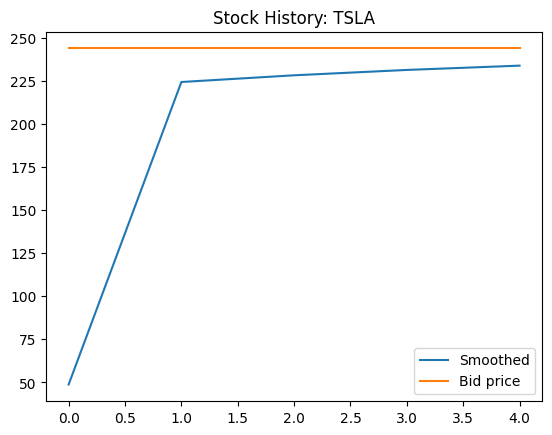

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Selling SNDL
Bought at 14.15
Sold at 1.4
YOUR $$$: -12.75
--------------------------------
checking DIS
--------------------------------
Selling DIS
Bought at 100.0
Sold at 84.05
YOUR $$$: -15.950000000000003
--------------------------------
checking NIO
checking META
--------------------------------
Selling META
Bought at 300.0
Sold at 1.0
YOUR $$$: -299.0
--------------------------------
checking LCID
--------------------------------
Selling LCID
Bought at 55.21
Sold at 6.1
YOUR $$$: -49.11
--------------------------------
checking VOO
--------------------------------
Selling VOO
Bought at 429.19
Sold at 361.56
YOUR $$$: -67.63
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Selling GPRO
Bought at 4.6
Sold at 3.83
YOUR $$$: -0.76999999999999

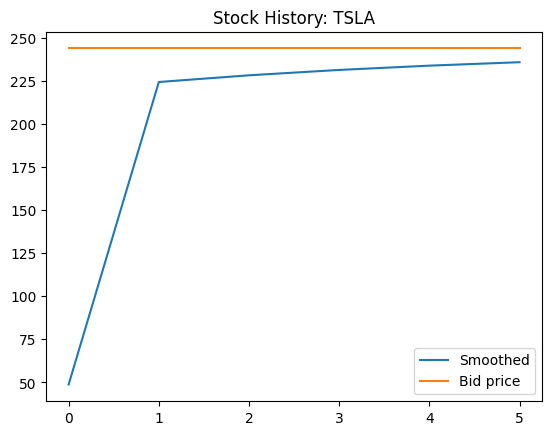

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Buying SNDL
Bought at 14.15
--------------------------------
checking DIS
--------------------------------
Buying DIS
Bought at 100.0
--------------------------------
checking NIO
checking META
--------------------------------
Buying META
Bought at 300.0
--------------------------------
checking LCID
--------------------------------
Buying LCID
Bought at 55.21
--------------------------------
checking VOO
--------------------------------
Buying VOO
Bought at 429.19
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Buying GPRO
Bought at 4.6
--------------------------------
checking PFE
--------------------------------
Buying PFE
Bought at 44.15
--------------------------------
checking BABA
checking PLUG
checking CCL
checking AAL
----------------

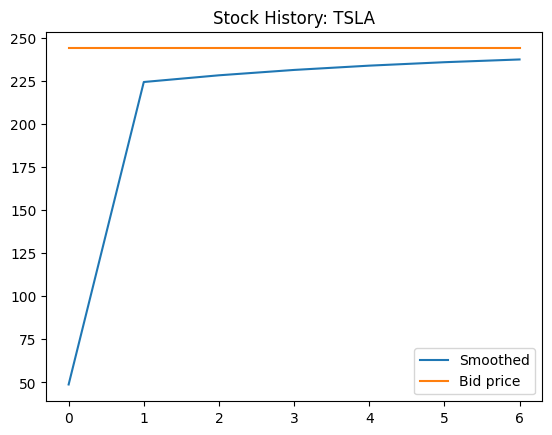

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Selling SNDL
Bought at 14.15
Sold at 1.4
YOUR $$$: -12.75
--------------------------------
checking DIS
--------------------------------
Selling DIS
Bought at 100.0
Sold at 84.05
YOUR $$$: -15.950000000000003
--------------------------------
checking NIO
checking META
--------------------------------
Selling META
Bought at 300.0
Sold at 1.0
YOUR $$$: -299.0
--------------------------------
checking LCID
--------------------------------
Selling LCID
Bought at 55.21
Sold at 6.1
YOUR $$$: -49.11
--------------------------------
checking VOO
--------------------------------
Selling VOO
Bought at 429.19
Sold at 361.56
YOUR $$$: -67.63
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Selling GPRO
Bought at 4.6
Sold at 3.83
YOUR $$$: -0.76999999999999

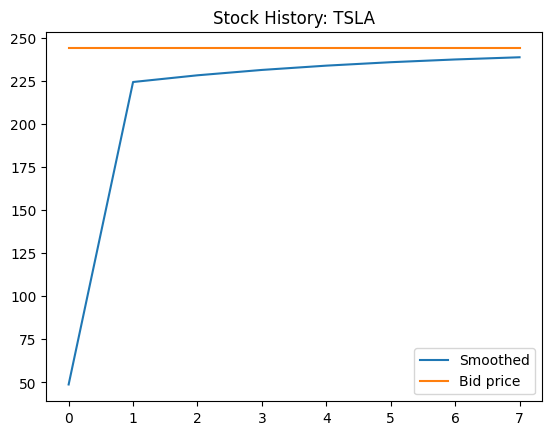

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Buying SNDL
Bought at 14.15
--------------------------------
checking DIS
--------------------------------
Buying DIS
Bought at 100.0
--------------------------------
checking NIO
checking META
--------------------------------
Buying META
Bought at 300.0
--------------------------------
checking LCID
--------------------------------
Buying LCID
Bought at 55.21
--------------------------------
checking VOO
--------------------------------
Buying VOO
Bought at 429.19
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Buying GPRO
Bought at 4.6
--------------------------------
checking PFE
--------------------------------
Buying PFE
Bought at 44.15
--------------------------------
checking BABA
checking PLUG
checking CCL
checking AAL
----------------

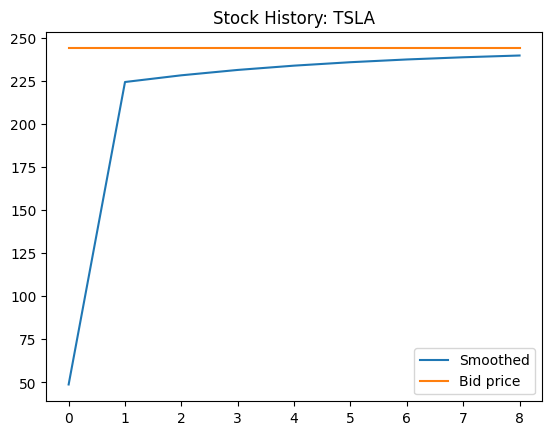

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Selling SNDL
Bought at 14.15
Sold at 1.4
YOUR $$$: -12.75
--------------------------------
checking DIS
--------------------------------
Selling DIS
Bought at 100.0
Sold at 84.05
YOUR $$$: -15.950000000000003
--------------------------------
checking NIO
checking META
--------------------------------
Selling META
Bought at 300.0
Sold at 1.0
YOUR $$$: -299.0
--------------------------------
checking LCID
--------------------------------
Selling LCID
Bought at 55.21
Sold at 6.1
YOUR $$$: -49.11
--------------------------------
checking VOO
--------------------------------
Selling VOO
Bought at 429.19
Sold at 361.56
YOUR $$$: -67.63
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Selling GPRO
Bought at 4.6
Sold at 3.83
YOUR $$$: -0.76999999999999

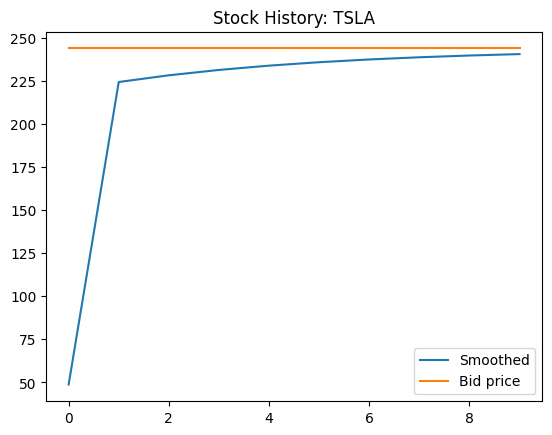

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Buying SNDL
Bought at 14.15
--------------------------------
checking DIS
--------------------------------
Buying DIS
Bought at 100.0
--------------------------------
checking NIO
checking META
--------------------------------
Buying META
Bought at 300.0
--------------------------------
checking LCID
--------------------------------
Buying LCID
Bought at 55.21
--------------------------------
checking VOO
--------------------------------
Buying VOO
Bought at 429.19
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Buying GPRO
Bought at 4.6
--------------------------------
checking PFE
--------------------------------
Buying PFE
Bought at 44.15
--------------------------------
checking BABA
checking PLUG
checking CCL
checking AAL
----------------

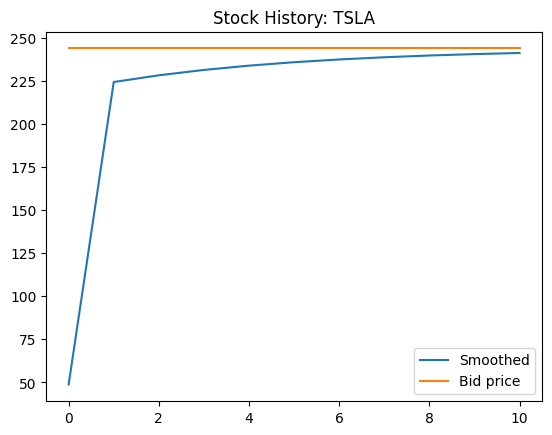

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Selling SNDL
Bought at 14.15
Sold at 1.4
YOUR $$$: -12.75
--------------------------------
checking DIS
--------------------------------
Selling DIS
Bought at 100.0
Sold at 84.05
YOUR $$$: -15.950000000000003
--------------------------------
checking NIO
checking META
--------------------------------
Selling META
Bought at 300.0
Sold at 1.0
YOUR $$$: -299.0
--------------------------------
checking LCID
--------------------------------
Selling LCID
Bought at 55.21
Sold at 6.1
YOUR $$$: -49.11
--------------------------------
checking VOO
--------------------------------
Selling VOO
Bought at 429.19
Sold at 361.56
YOUR $$$: -67.63
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Selling GPRO
Bought at 4.6
Sold at 3.83
YOUR $$$: -0.76999999999999

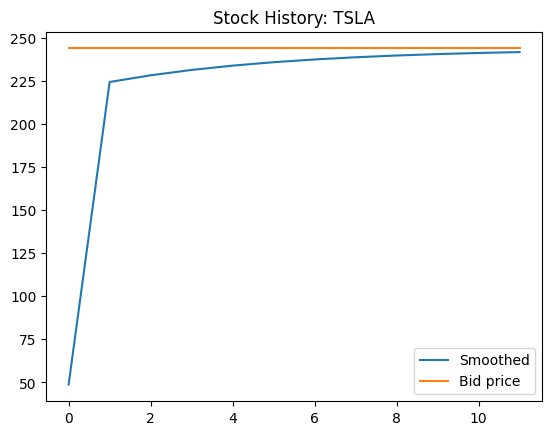

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Buying SNDL
Bought at 14.15
--------------------------------
checking DIS
--------------------------------
Buying DIS
Bought at 100.0
--------------------------------
checking NIO
checking META
--------------------------------
Buying META
Bought at 300.0
--------------------------------
checking LCID
--------------------------------
Buying LCID
Bought at 55.21
--------------------------------
checking VOO
--------------------------------
Buying VOO
Bought at 429.19
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Buying GPRO
Bought at 4.6
--------------------------------
checking PFE
--------------------------------
Buying PFE
Bought at 44.15
--------------------------------
checking BABA
checking PLUG
checking CCL
checking AAL
----------------

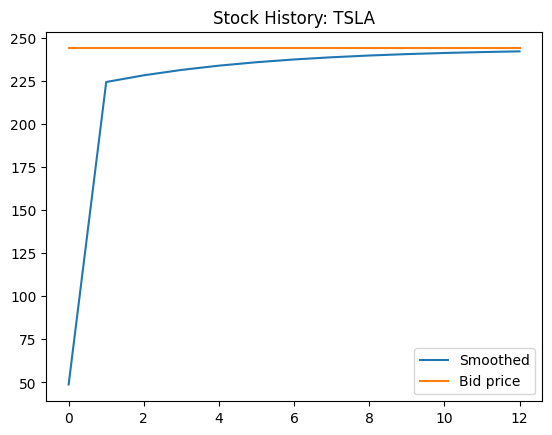

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Selling SNDL
Bought at 14.15
Sold at 1.4
YOUR $$$: -12.75
--------------------------------
checking DIS
--------------------------------
Selling DIS
Bought at 100.0
Sold at 84.05
YOUR $$$: -15.950000000000003
--------------------------------
checking NIO
checking META
--------------------------------
Selling META
Bought at 300.0
Sold at 1.0
YOUR $$$: -299.0
--------------------------------
checking LCID
--------------------------------
Selling LCID
Bought at 55.21
Sold at 6.1
YOUR $$$: -49.11
--------------------------------
checking VOO
--------------------------------
Selling VOO
Bought at 429.19
Sold at 361.56
YOUR $$$: -67.63
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Selling GPRO
Bought at 4.6
Sold at 3.83
YOUR $$$: -0.76999999999999

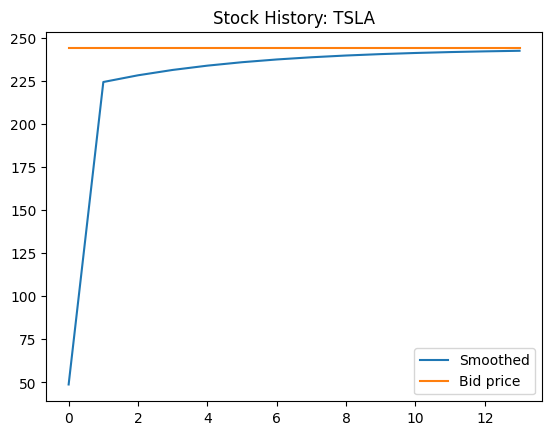

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Buying SNDL
Bought at 14.15
--------------------------------
checking DIS
--------------------------------
Buying DIS
Bought at 100.0
--------------------------------
checking NIO
checking META
--------------------------------
Buying META
Bought at 300.0
--------------------------------
checking LCID
--------------------------------
Buying LCID
Bought at 55.21
--------------------------------
checking VOO
--------------------------------
Buying VOO
Bought at 429.19
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Buying GPRO
Bought at 4.6
--------------------------------
checking PFE
--------------------------------
Buying PFE
Bought at 44.15
--------------------------------
checking BABA
checking PLUG
checking CCL
checking AAL
----------------

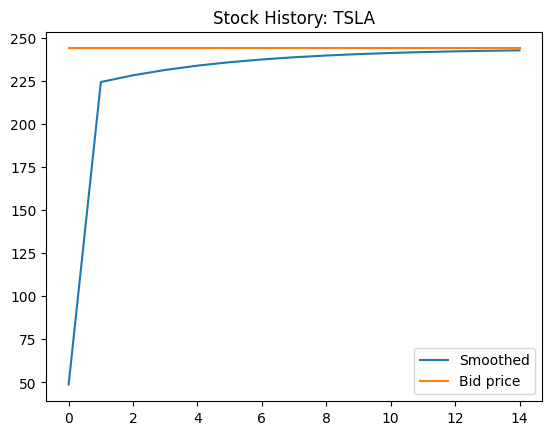

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Selling SNDL
Bought at 14.15
Sold at 1.4
YOUR $$$: -12.75
--------------------------------
checking DIS
--------------------------------
Selling DIS
Bought at 100.0
Sold at 84.05
YOUR $$$: -15.950000000000003
--------------------------------
checking NIO
checking META
--------------------------------
Selling META
Bought at 300.0
Sold at 1.0
YOUR $$$: -299.0
--------------------------------
checking LCID
--------------------------------
Selling LCID
Bought at 55.21
Sold at 6.1
YOUR $$$: -49.11
--------------------------------
checking VOO
--------------------------------
Selling VOO
Bought at 429.19
Sold at 361.56
YOUR $$$: -67.63
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Selling GPRO
Bought at 4.6
Sold at 3.83
YOUR $$$: -0.76999999999999

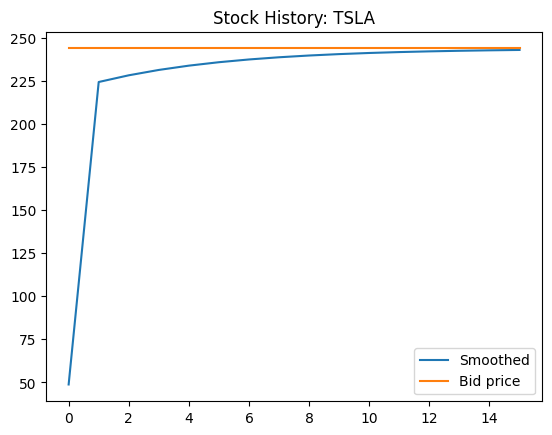

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Buying SNDL
Bought at 14.15
--------------------------------
checking DIS
--------------------------------
Buying DIS
Bought at 100.0
--------------------------------
checking NIO
checking META
--------------------------------
Buying META
Bought at 300.0
--------------------------------
checking LCID
--------------------------------
Buying LCID
Bought at 55.21
--------------------------------
checking VOO
--------------------------------
Buying VOO
Bought at 429.19
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Buying GPRO
Bought at 4.6
--------------------------------
checking PFE
--------------------------------
Buying PFE
Bought at 44.15
--------------------------------
checking BABA
checking PLUG
checking CCL
checking AAL
----------------

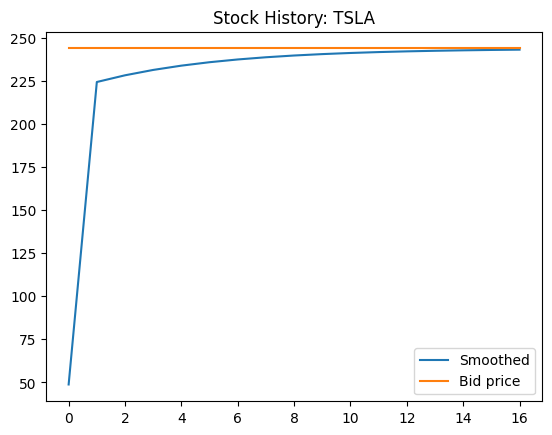

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Selling SNDL
Bought at 14.15
Sold at 1.4
YOUR $$$: -12.75
--------------------------------
checking DIS
--------------------------------
Selling DIS
Bought at 100.0
Sold at 84.05
YOUR $$$: -15.950000000000003
--------------------------------
checking NIO
checking META
--------------------------------
Selling META
Bought at 300.0
Sold at 1.0
YOUR $$$: -299.0
--------------------------------
checking LCID
--------------------------------
Selling LCID
Bought at 55.21
Sold at 6.1
YOUR $$$: -49.11
--------------------------------
checking VOO
--------------------------------
Selling VOO
Bought at 429.19
Sold at 361.56
YOUR $$$: -67.63
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Selling GPRO
Bought at 4.6
Sold at 3.83
YOUR $$$: -0.76999999999999

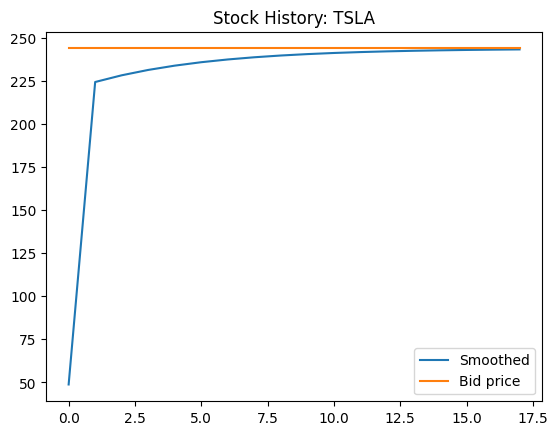

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Buying SNDL
Bought at 14.15
--------------------------------
checking DIS
--------------------------------
Buying DIS
Bought at 100.0
--------------------------------
checking NIO
checking META
--------------------------------
Buying META
Bought at 300.0
--------------------------------
checking LCID
--------------------------------
Buying LCID
Bought at 55.21
--------------------------------
checking VOO
--------------------------------
Buying VOO
Bought at 429.19
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Buying GPRO
Bought at 4.6
--------------------------------
checking PFE
--------------------------------
Buying PFE
Bought at 44.15
--------------------------------
checking BABA
checking PLUG
checking CCL
checking AAL
----------------

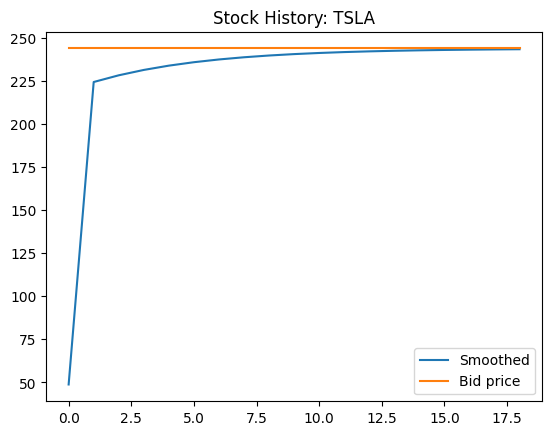

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Selling SNDL
Bought at 14.15
Sold at 1.4
YOUR $$$: -12.75
--------------------------------
checking DIS
--------------------------------
Selling DIS
Bought at 100.0
Sold at 84.05
YOUR $$$: -15.950000000000003
--------------------------------
checking NIO
checking META
--------------------------------
Selling META
Bought at 300.0
Sold at 1.0
YOUR $$$: -299.0
--------------------------------
checking LCID
--------------------------------
Selling LCID
Bought at 55.21
Sold at 6.1
YOUR $$$: -49.11
--------------------------------
checking VOO
--------------------------------
Selling VOO
Bought at 429.19
Sold at 361.56
YOUR $$$: -67.63
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Selling GPRO
Bought at 4.6
Sold at 3.83
YOUR $$$: -0.76999999999999

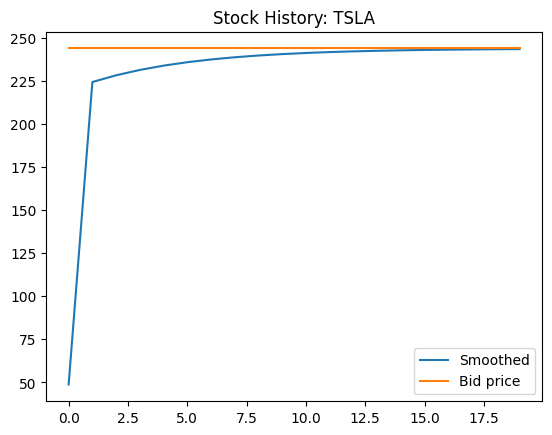

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Buying SNDL
Bought at 14.15
--------------------------------
checking DIS
--------------------------------
Buying DIS
Bought at 100.0
--------------------------------
checking NIO
checking META
--------------------------------
Buying META
Bought at 300.0
--------------------------------
checking LCID
--------------------------------
Buying LCID
Bought at 55.21
--------------------------------
checking VOO
--------------------------------
Buying VOO
Bought at 429.19
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Buying GPRO
Bought at 4.6
--------------------------------
checking PFE
--------------------------------
Buying PFE
Bought at 44.15
--------------------------------
checking BABA
checking PLUG
checking CCL
checking AAL
----------------

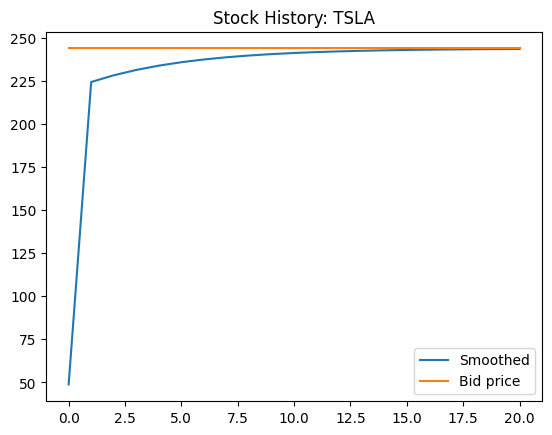

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Selling SNDL
Bought at 14.15
Sold at 1.4
YOUR $$$: -12.75
--------------------------------
checking DIS
--------------------------------
Selling DIS
Bought at 100.0
Sold at 84.05
YOUR $$$: -15.950000000000003
--------------------------------
checking NIO
checking META
--------------------------------
Selling META
Bought at 300.0
Sold at 1.0
YOUR $$$: -299.0
--------------------------------
checking LCID
--------------------------------
Selling LCID
Bought at 55.21
Sold at 6.1
YOUR $$$: -49.11
--------------------------------
checking VOO
--------------------------------
Selling VOO
Bought at 429.19
Sold at 361.56
YOUR $$$: -67.63
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Selling GPRO
Bought at 4.6
Sold at 3.83
YOUR $$$: -0.76999999999999

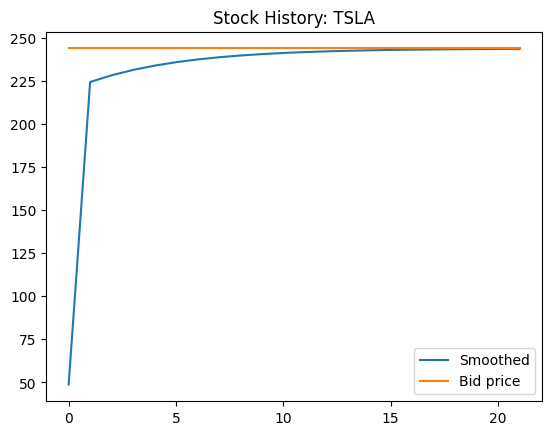

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Buying SNDL
Bought at 14.15
--------------------------------
checking DIS
--------------------------------
Buying DIS
Bought at 100.0
--------------------------------
checking NIO
checking META
--------------------------------
Buying META
Bought at 300.0
--------------------------------
checking LCID
--------------------------------
Buying LCID
Bought at 55.21
--------------------------------
checking VOO
--------------------------------
Buying VOO
Bought at 429.19
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Buying GPRO
Bought at 4.6
--------------------------------
checking PFE
--------------------------------
Buying PFE
Bought at 44.15
--------------------------------
checking BABA
checking PLUG
checking CCL
checking AAL
----------------

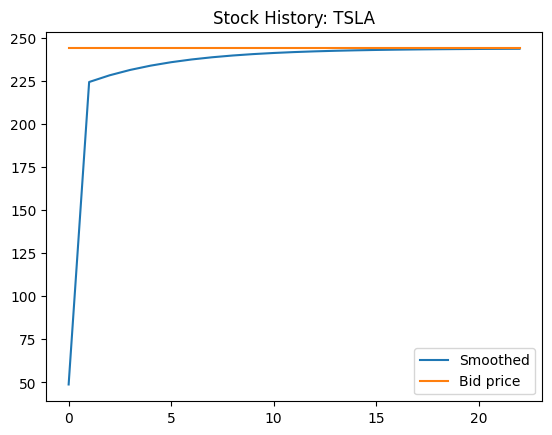

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Selling SNDL
Bought at 14.15
Sold at 1.4
YOUR $$$: -12.75
--------------------------------
checking DIS
--------------------------------
Selling DIS
Bought at 100.0
Sold at 84.05
YOUR $$$: -15.950000000000003
--------------------------------
checking NIO
checking META
--------------------------------
Selling META
Bought at 300.0
Sold at 1.0
YOUR $$$: -299.0
--------------------------------
checking LCID
--------------------------------
Selling LCID
Bought at 55.21
Sold at 6.1
YOUR $$$: -49.11
--------------------------------
checking VOO
--------------------------------
Selling VOO
Bought at 429.19
Sold at 361.56
YOUR $$$: -67.63
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Selling GPRO
Bought at 4.6
Sold at 3.83
YOUR $$$: -0.76999999999999

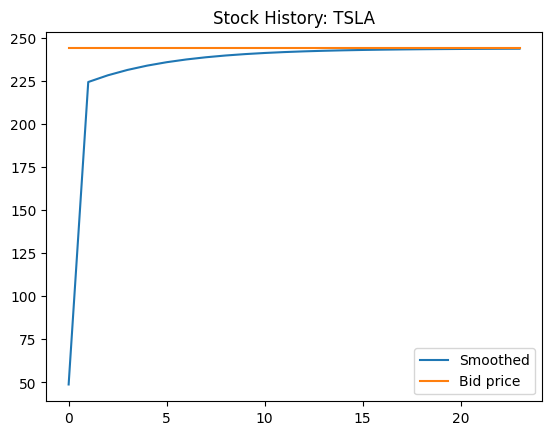

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Buying SNDL
Bought at 14.15
--------------------------------
checking DIS
--------------------------------
Buying DIS
Bought at 100.0
--------------------------------
checking NIO
checking META
--------------------------------
Buying META
Bought at 300.0
--------------------------------
checking LCID
--------------------------------
Buying LCID
Bought at 55.21
--------------------------------
checking VOO
--------------------------------
Buying VOO
Bought at 429.19
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Buying GPRO
Bought at 4.6
--------------------------------
checking PFE
--------------------------------
Buying PFE
Bought at 44.15
--------------------------------
checking BABA
checking PLUG
checking CCL
checking AAL
----------------

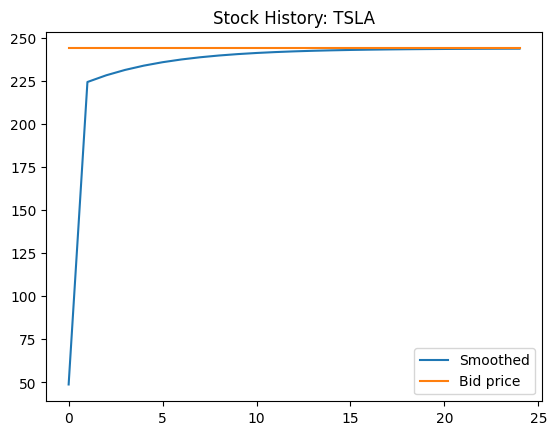

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Selling SNDL
Bought at 14.15
Sold at 1.4
YOUR $$$: -12.75
--------------------------------
checking DIS
--------------------------------
Selling DIS
Bought at 100.0
Sold at 84.05
YOUR $$$: -15.950000000000003
--------------------------------
checking NIO
checking META
--------------------------------
Selling META
Bought at 300.0
Sold at 1.0
YOUR $$$: -299.0
--------------------------------
checking LCID
--------------------------------
Selling LCID
Bought at 55.21
Sold at 6.1
YOUR $$$: -49.11
--------------------------------
checking VOO
--------------------------------
Selling VOO
Bought at 429.19
Sold at 361.56
YOUR $$$: -67.63
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Selling GPRO
Bought at 4.6
Sold at 3.83
YOUR $$$: -0.76999999999999

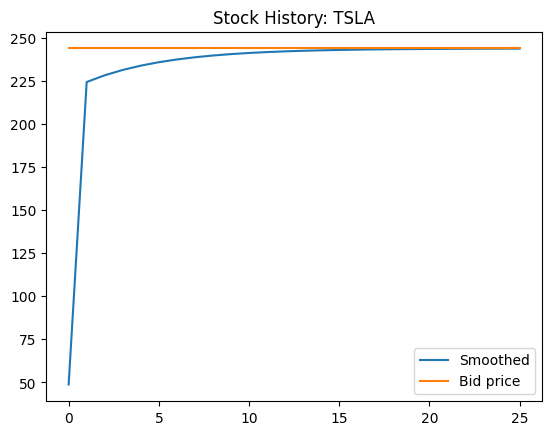

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Buying SNDL
Bought at 14.15
--------------------------------
checking DIS
--------------------------------
Buying DIS
Bought at 100.0
--------------------------------
checking NIO
checking META
--------------------------------
Buying META
Bought at 300.0
--------------------------------
checking LCID
--------------------------------
Buying LCID
Bought at 55.21
--------------------------------
checking VOO
--------------------------------
Buying VOO
Bought at 429.19
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Buying GPRO
Bought at 4.6
--------------------------------
checking PFE
--------------------------------
Buying PFE
Bought at 44.15
--------------------------------
checking BABA
checking PLUG
checking CCL
checking AAL
----------------

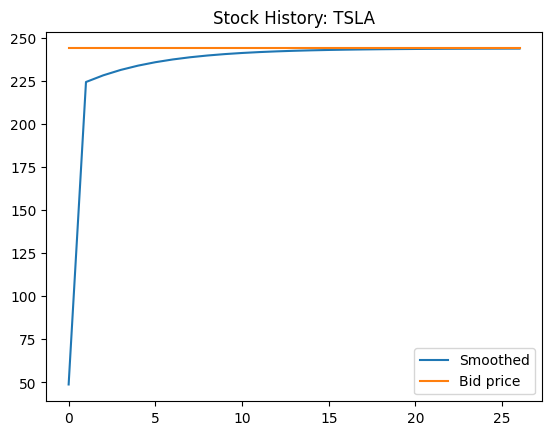

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Selling SNDL
Bought at 14.15
Sold at 1.4
YOUR $$$: -12.75
--------------------------------
checking DIS
--------------------------------
Selling DIS
Bought at 100.0
Sold at 84.05
YOUR $$$: -15.950000000000003
--------------------------------
checking NIO
checking META
--------------------------------
Selling META
Bought at 300.0
Sold at 1.0
YOUR $$$: -299.0
--------------------------------
checking LCID
--------------------------------
Selling LCID
Bought at 55.21
Sold at 6.1
YOUR $$$: -49.11
--------------------------------
checking VOO
--------------------------------
Selling VOO
Bought at 429.19
Sold at 361.56
YOUR $$$: -67.63
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Selling GPRO
Bought at 4.6
Sold at 3.83
YOUR $$$: -0.76999999999999

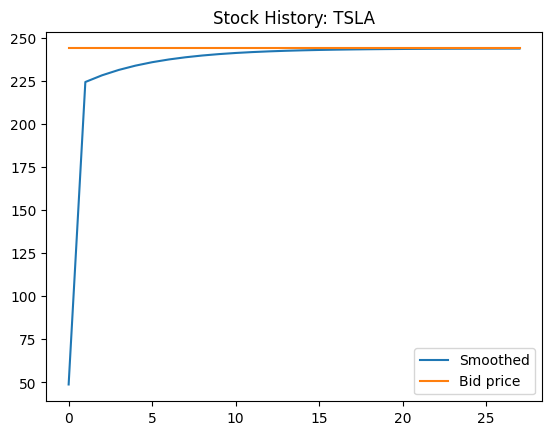

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Buying SNDL
Bought at 14.15
--------------------------------
checking DIS
--------------------------------
Buying DIS
Bought at 100.0
--------------------------------
checking NIO
checking META
--------------------------------
Buying META
Bought at 300.0
--------------------------------
checking LCID
--------------------------------
Buying LCID
Bought at 55.21
--------------------------------
checking VOO
--------------------------------
Buying VOO
Bought at 429.19
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Buying GPRO
Bought at 4.6
--------------------------------
checking PFE
--------------------------------
Buying PFE
Bought at 44.15
--------------------------------
checking BABA
checking PLUG
checking CCL
checking AAL
----------------

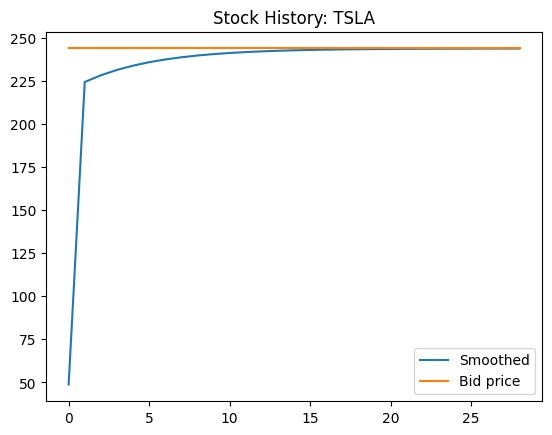

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Selling SNDL
Bought at 14.15
Sold at 1.4
YOUR $$$: -12.75
--------------------------------
checking DIS
--------------------------------
Selling DIS
Bought at 100.0
Sold at 84.05
YOUR $$$: -15.950000000000003
--------------------------------
checking NIO
checking META
--------------------------------
Selling META
Bought at 300.0
Sold at 1.0
YOUR $$$: -299.0
--------------------------------
checking LCID
--------------------------------
Selling LCID
Bought at 55.21
Sold at 6.1
YOUR $$$: -49.11
--------------------------------
checking VOO
--------------------------------
Selling VOO
Bought at 429.19
Sold at 361.56
YOUR $$$: -67.63
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Selling GPRO
Bought at 4.6
Sold at 3.83
YOUR $$$: -0.76999999999999

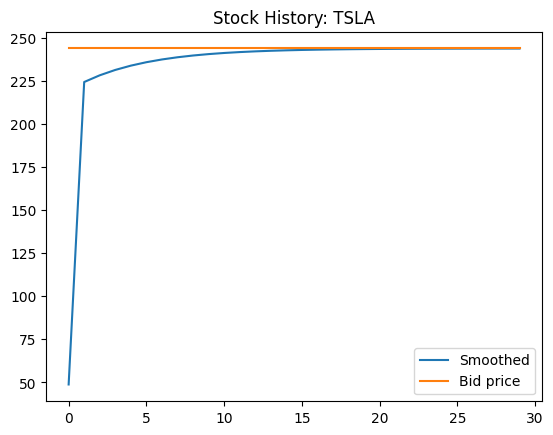

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Buying SNDL
Bought at 14.15
--------------------------------
checking DIS
--------------------------------
Buying DIS
Bought at 100.0
--------------------------------
checking NIO
checking META
--------------------------------
Buying META
Bought at 300.0
--------------------------------
checking LCID
--------------------------------
Buying LCID
Bought at 55.21
--------------------------------
checking VOO
--------------------------------
Buying VOO
Bought at 429.19
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Buying GPRO
Bought at 4.6
--------------------------------
checking PFE
--------------------------------
Buying PFE
Bought at 44.15
--------------------------------
checking BABA
checking PLUG
checking CCL
checking AAL
----------------

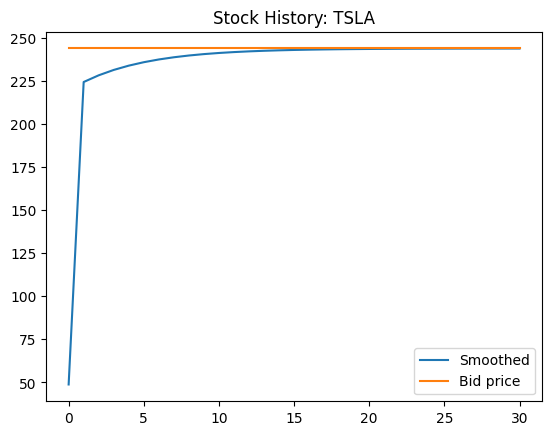

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Selling SNDL
Bought at 14.15
Sold at 1.4
YOUR $$$: -12.75
--------------------------------
checking DIS
--------------------------------
Selling DIS
Bought at 100.0
Sold at 84.05
YOUR $$$: -15.950000000000003
--------------------------------
checking NIO
checking META
--------------------------------
Selling META
Bought at 300.0
Sold at 1.0
YOUR $$$: -299.0
--------------------------------
checking LCID
--------------------------------
Selling LCID
Bought at 55.21
Sold at 6.1
YOUR $$$: -49.11
--------------------------------
checking VOO
--------------------------------
Selling VOO
Bought at 429.19
Sold at 361.56
YOUR $$$: -67.63
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Selling GPRO
Bought at 4.6
Sold at 3.83
YOUR $$$: -0.76999999999999

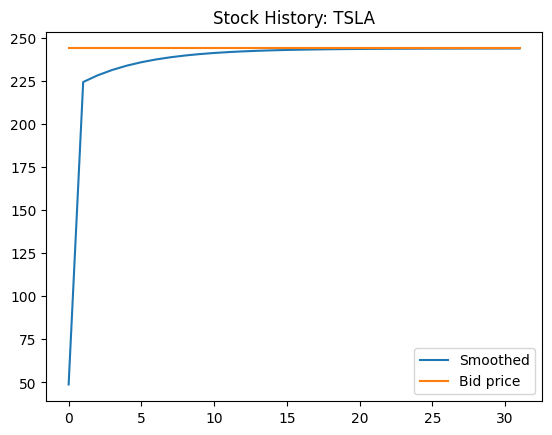

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Buying SNDL
Bought at 14.15
--------------------------------
checking DIS
--------------------------------
Buying DIS
Bought at 100.0
--------------------------------
checking NIO
checking META
--------------------------------
Buying META
Bought at 300.0
--------------------------------
checking LCID
--------------------------------
Buying LCID
Bought at 55.21
--------------------------------
checking VOO
--------------------------------
Buying VOO
Bought at 429.19
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Buying GPRO
Bought at 4.6
--------------------------------
checking PFE
--------------------------------
Buying PFE
Bought at 44.15
--------------------------------
checking BABA
checking PLUG
checking CCL
checking AAL
----------------

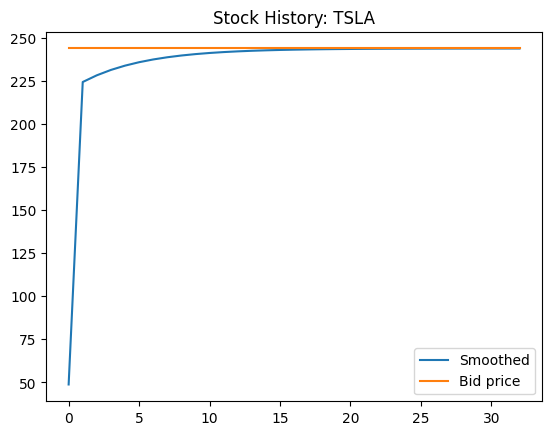

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Selling SNDL
Bought at 14.15
Sold at 1.4
YOUR $$$: -12.75
--------------------------------
checking DIS
--------------------------------
Selling DIS
Bought at 100.0
Sold at 84.05
YOUR $$$: -15.950000000000003
--------------------------------
checking NIO
checking META
--------------------------------
Selling META
Bought at 300.0
Sold at 1.0
YOUR $$$: -299.0
--------------------------------
checking LCID
--------------------------------
Selling LCID
Bought at 55.21
Sold at 6.1
YOUR $$$: -49.11
--------------------------------
checking VOO
--------------------------------
Selling VOO
Bought at 429.19
Sold at 361.56
YOUR $$$: -67.63
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Selling GPRO
Bought at 4.6
Sold at 3.83
YOUR $$$: -0.76999999999999

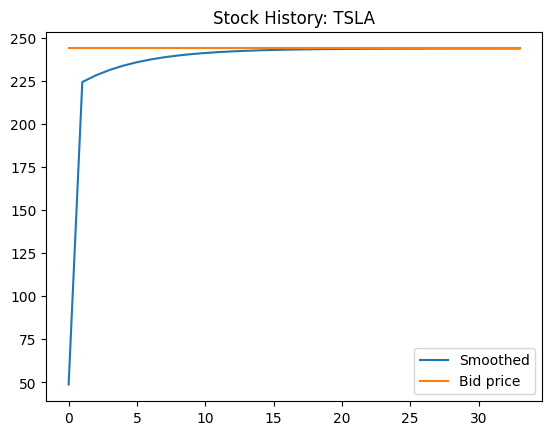

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Buying SNDL
Bought at 14.15
--------------------------------
checking DIS
--------------------------------
Buying DIS
Bought at 100.0
--------------------------------
checking NIO
checking META
--------------------------------
Buying META
Bought at 300.0
--------------------------------
checking LCID
--------------------------------
Buying LCID
Bought at 55.21
--------------------------------
checking VOO
--------------------------------
Buying VOO
Bought at 429.19
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Buying GPRO
Bought at 4.6
--------------------------------
checking PFE
--------------------------------
Buying PFE
Bought at 44.15
--------------------------------
checking BABA
checking PLUG
checking CCL
checking AAL
----------------

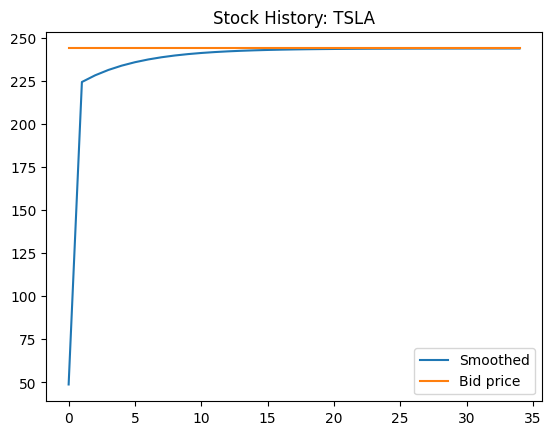

tick
checking TSLA
checking AAPL
checking AMZN
checking F
checking AMC
checking APE
checking MSFT
checking SNDL
--------------------------------
Selling SNDL
Bought at 14.15
Sold at 1.4
YOUR $$$: -12.75
--------------------------------
checking DIS
--------------------------------
Selling DIS
Bought at 100.0
Sold at 84.05
YOUR $$$: -15.950000000000003
--------------------------------
checking NIO
checking META
--------------------------------
Selling META
Bought at 300.0
Sold at 1.0
YOUR $$$: -299.0
--------------------------------
checking LCID
--------------------------------
Selling LCID
Bought at 55.21
Sold at 6.1
YOUR $$$: -49.11
--------------------------------
checking VOO
--------------------------------
Selling VOO
Bought at 429.19
Sold at 361.56
YOUR $$$: -67.63
--------------------------------
checking NVDA
checking NFLX
checking SPY
checking GOOGL
checking SNAP
checking GPRO
--------------------------------
Selling GPRO
Bought at 4.6
Sold at 3.83
YOUR $$$: -0.76999999999999

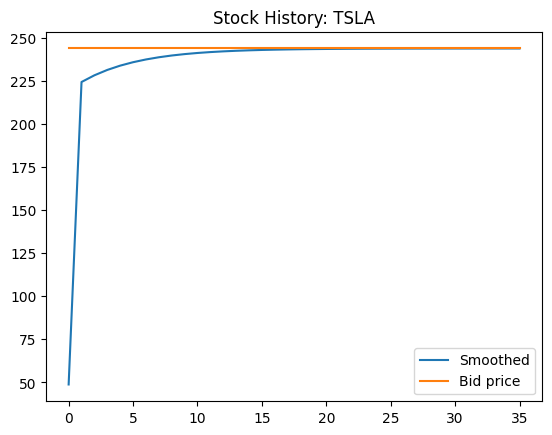

In [ ]:
import time
#print(dixonStocks)
while True:
    print("tick")
    # get top stocks
    top_stocks = rs.get_top_100()
    
    BuyLowSellHigh(top100listOfDicts)
    
    # get the 0th index in dixonStocks
    for k, stock in dixonStocks.items():
        stock.graph()
        break
    
    # every 5 seconds
    time.sleep(2)

 = rs.get_all_stocks_from_market_tag('technology') # get all tech tags<br>
rint(a)

Here are some example calls

In [ ]:
rs.robinhood.get_all_open_crypto_orders() # gets all cypto orders from Robinhood
rs.logout()